##EE 399
##Sam Tam
##4/15/23
##HW 2

In [25]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.linalg import eig

##Part A

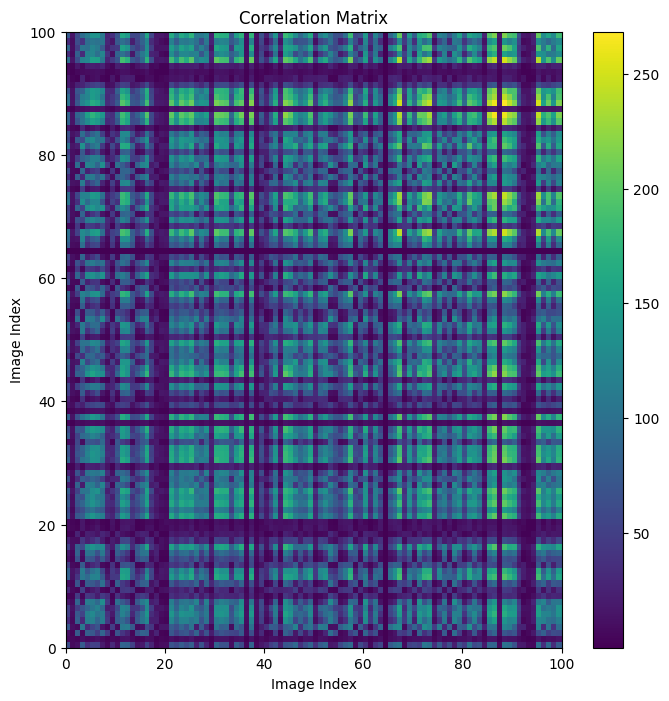

In [26]:
# Load the .mat file
results = loadmat('/yalefaces.mat')
X = results['X']

# Compute the correlation matrix
X_100 = X[:, :100]  # Select the first 100 columns of X
C = np.dot(X_100.T, X_100)  # Compute the dot product of X_100 with its transpose

# Plot the correlation matrix using pcolor
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pcolor(C)  # Plot the correlation matrix
plt.colorbar()  # Add a colorbar
plt.title('Correlation Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()  # Show the plot

##Part B

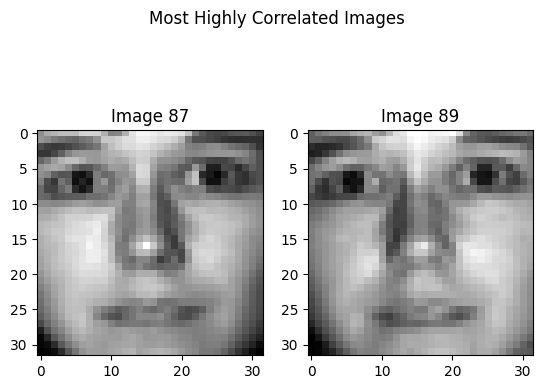

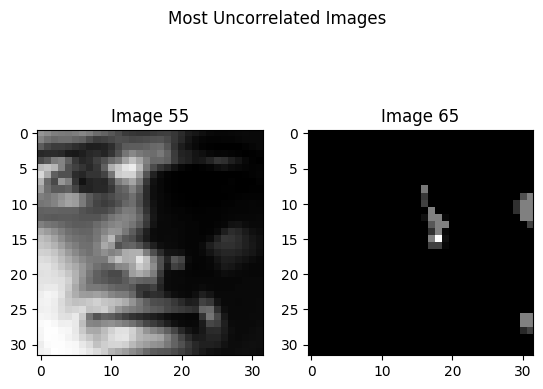

In [27]:
# Find the indices of the most highly correlated and most uncorrelated images
i, j = np.unravel_index(np.argmax(C - np.eye(C.shape[0])*np.max(C)), C.shape)
k, l = np.unravel_index(np.argmin(C + np.eye(C.shape[0])*np.max(C)), C.shape)

# Plot the most highly correlated images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X[:, i].reshape(32, 32), cmap='gray')
axs[0].set_title(f"Image {i+1}")
axs[1].imshow(X[:, j].reshape(32, 32), cmap='gray')
axs[1].set_title(f"Image {j+1}")
plt.suptitle("Most Highly Correlated Images")

# Plot the most uncorrelated images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X[:, k].reshape(32, 32), cmap='gray')
axs[0].set_title(f"Image {k+1}")
axs[1].imshow(X[:, l].reshape(32, 32), cmap='gray')
axs[1].set_title(f"Image {l+1}")
plt.suptitle("Most Uncorrelated Images")

plt.show()

##Part C

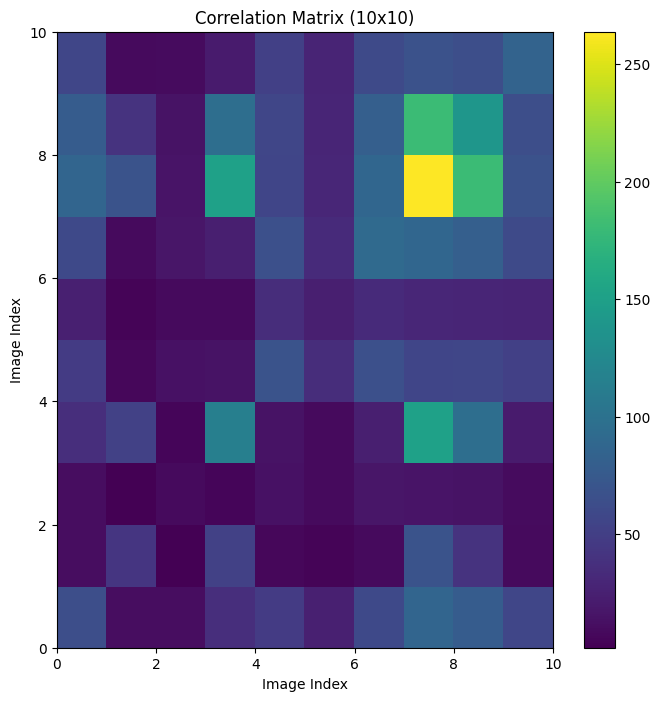

In [28]:
# Select the specific image indices for computing the correlation matrix
image_indices = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]  # 1-based indexing

# Extract the corresponding image columns from X
X_10 = X[:, image_indices]

# Compute the correlation matrix
C_10 = np.dot(X_10.T, X_10)  # Compute the dot product of X_10 with its transpose

# Plot the correlation matrix using pcolor
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pcolor(C_10)  # Plot the correlation matrix
plt.colorbar()  # Add a colorbar
plt.title('Correlation Matrix (10x10)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()  # Show the plot

##Part D

In [29]:
# Create the matrix Y = X * X^T
Y = np.dot(X, X.T)

# Compute the eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = eig(Y)
# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Extract the first six eigenvectors with the largest magnitude eigenvalues
eigenvectors_largest = eigenvectors_sorted[:, :6]

# Normalize the eigenvectors
eigenvectors_largest_normalized = eigenvectors_largest / np.linalg.norm(eigenvectors_largest, axis=0)

# The eigenvectors with the largest magnitude eigenvalues are in the columns of eigenvectors_largest_normalized
print(eigenvectors_largest_normalized)

[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


##Part E

In [30]:
# Perform Singular Value Decomposition (SVD) on X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Find the first six principal component directions
principal_component_directions = U[:, :6]

# The first six principal component directions are in the columns of principal_components
print(principal_component_directions)

[[-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146 -0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448 -0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937  0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902   0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019   0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]


##Part F

In [31]:
# Extract the first eigenvector v1
v1 = eigenvectors_largest_normalized[:, 0]
# Extract the first SVD mode u1
u1 = principal_component_directions[:, 0]
# Compute the norm of difference of absolute values
norm_diff = np.linalg.norm(np.abs(v1) - np.abs(u1))

print(f'Norm of difference between v1 and u1: {norm_diff}')

Norm of difference between v1 and u1: 6.762462983478808e-16


##Part G

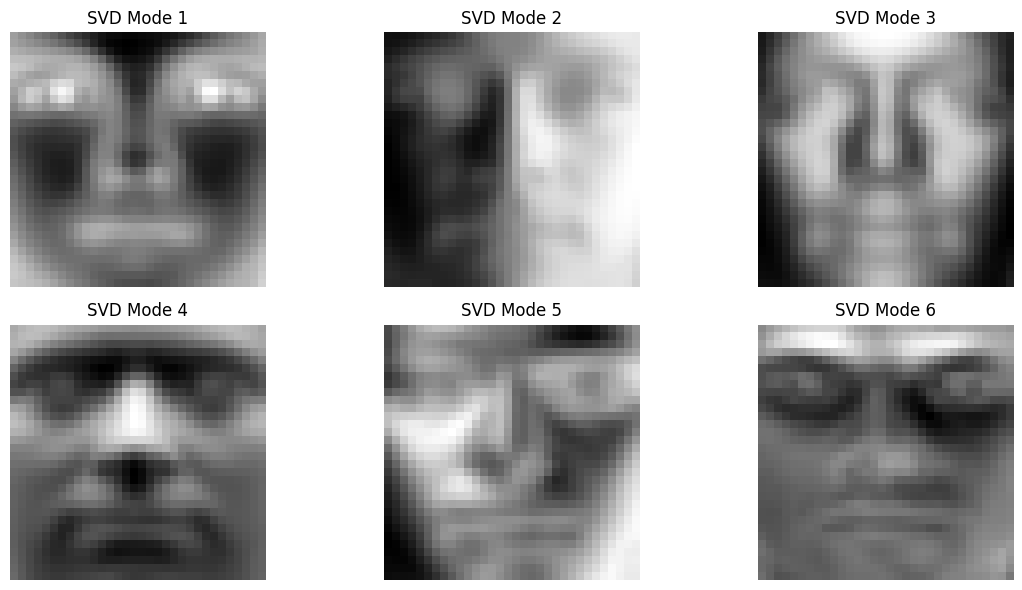

Percentage of Variance Captured by SVD Mode 1: 72.93%
Percentage of Variance Captured by SVD Mode 2: 15.28%
Percentage of Variance Captured by SVD Mode 3: 2.57%
Percentage of Variance Captured by SVD Mode 4: 1.88%
Percentage of Variance Captured by SVD Mode 5: 0.64%
Percentage of Variance Captured by SVD Mode 6: 0.59%


In [32]:
# Perform Singular Value Decomposition (SVD) on X
U, S, VT = np.linalg.svd(X)

# Extract the singular values
singular_values = S[:6]
# Compute the percentage of variance captured by each SVD mode
variance_percentage = (singular_values ** 2) / (np.sum(S ** 2)) * 100

# Plot the first 6 SVD modes
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(U[:, i].reshape(32, 32), cmap='gray')
    plt.axis('off')
    plt.title(f'SVD Mode {i+1}')

plt.tight_layout()
plt.show()

# Print the percentage of variance captured by each SVD mode
for i in range(6):
    print(f'Percentage of Variance Captured by SVD Mode {i+1}: {variance_percentage[i]:.2f}%')
